# Introduction

The goal of this project is to wrangle `WeRateDogs` Twitter data to create interesting and trustworthy analyses and visualizations. Three dataset will be worked on and analysed before visualisation.

In [164]:
# Import libraries to be used for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import json
import tweepy
import requests
import os

## Gather

* Read the Twitter Archive Enchanced data into Pandas.
* Download the Tweet Image Prediction Programmatically and read into Pandas.
* Gather each tweet's retweet count and favorite ("like") count via Twitter API and read into Pandas.

In [165]:
# Read the twitter archive enchanced dataframe into pandas
twitter_archive_df = pd.read_csv('twitter-archive-enhanced.csv')

In [166]:
twitter_archive_df.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None


In [167]:
twitter_archive_df[twitter_archive_df.retweeted_status_id.notna()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1023,746521445350707200,NaN,NaN,2016-06-25 01:52:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Shaggy. He knows exactl...,6.678667e+17,4.196984e+09,2015-11-21 00:46:50 +0000,https://twitter.com/dog_rates/status/667866724...,10,10,Shaggy,None,None,None,None
1043,743835915802583040,NaN,NaN,2016-06-17 16:01:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Extremely intelligent dog here....,6.671383e+17,4.196984e+09,2015-11-19 00:32:12 +0000,https://twitter.com/dog_rates/status/667138269...,10,10,None,None,None,None,None
1242,711998809858043904,NaN,NaN,2016-03-21 19:31:59 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @twitter: @dog_rates Awesome Tweet! 12/10. ...,7.119983e+17,7.832140e+05,2016-03-21 19:29:52 +0000,https://twitter.com/twitter/status/71199827977...,12,10,None,None,None,None,None
2259,667550904950915073,NaN,NaN,2015-11-20 03:51:52 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",RT @dogratingrating: Exceptional talent. Origi...,6.675487e+17,4.296832e+09,2015-11-20 03:43:06 +0000,https://twitter.com/dogratingrating/status/667...,12,10,None,None,None,None,None


In [168]:
# Download the image prediction data programmatically
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

# Save the data into a readeable text file
with open ('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)

# Read the data into Pandas DataFrame
image_pred_df = pd.read_csv('image-predictions.tsv',sep="\t")

In [169]:
image_pred_df.head(2)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True


In [170]:
# Get the retweet count and favourite count from the json data.
# Create an empty list to gather data
tweet_data = []

# Open json text file for extraction.
with open('tweet-json.txt') as file:
    for data in file:
        sub_data = dict()
        all_data = json.loads(data)

        # extract tweet_id, retweet_count and favourite_count
        sub_data['tweet_id'] = all_data['id']
        sub_data['retweet_count'] = all_data['retweet_count']
        sub_data['favorite_count'] = all_data['favorite_count']

        # Append it to the data gathering list
        tweet_data.append(sub_data)
        

# Create a dataframe from the data
tweet_count = pd.DataFrame(tweet_data)
tweet_count.sample(5)

,tweet_id,retweet_count,favorite_count
1999,672482722825261057,665,1221
606,798209839306514432,2954,11548
1823,676470639084101634,5224,12616
1185,718460005985447936,602,2846
1413,698703483621523456,425,1608


## Access

In [171]:
# Preview 10 sample observations for visual assessment
twitter_archive_df.sample(10)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2256,667766675769573376,NaN,NaN,2015-11-20 18:09:16 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",This is Calvin. He is a Luxembourgian Mayo. Ha...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667766675...,9,10,Calvin,None,None,None,None
260,842892208864923648,NaN,NaN,2017-03-18 00:15:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Stephan. He just wants ...,8.071068e+17,4.196984e+09,2016-12-09 06:17:20 +0000,https://twitter.com/dog_rates/status/807106840...,13,10,Stephan,None,None,None,None
1656,683357973142474752,NaN,NaN,2016-01-02 18:43:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","""Have a seat, son. There are some things we ne...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/683357973...,10,10,None,None,None,None,None
1039,744234799360020481,NaN,NaN,2016-06-18 18:26:18 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here's a doggo realizing you can stand in a po...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/744234799...,13,10,None,doggo,None,None,None
1944,673708611235921920,NaN,NaN,2015-12-07 03:40:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Riley. She's just an adorable football...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/673708611...,12,10,Riley,None,None,None,None
1044,743609206067040256,NaN,NaN,2016-06-17 01:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Stark. He just had his first ice cream co...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/743609206...,10,10,Stark,None,None,None,None
2243,667902449697558528,NaN,NaN,2015-11-21 03:08:47 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cleopatricia. She is a northern Paperb...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667902449...,9,10,Cleopatricia,None,None,None,None
916,756998049151549440,NaN,NaN,2016-07-23 23:42:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Oliver. He's an English Creamschnitzel...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/756998049...,11,10,Oliver,None,None,None,None
774,776218204058357768,NaN,NaN,2016-09-15 00:36:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Atlas rolled around in some chalk and now he's...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776218204...,13,10,None,None,floofer,None,None
1027,746056683365994496,NaN,NaN,2016-06-23 19:05:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Arlen and Thumpelina. They are best pa...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/746056683...,11,10,Arlen,None,None,None,None


In [172]:
twitter_archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [173]:
# Preview 10 samples for visual assessment
image_pred_df.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
466,675015141583413248,https://pbs.twimg.com/media/CV4iqh5WcAEV1E6.jpg,1,street_sign,0.290091,False,golden_retriever,0.258372,True,sandbar,0.132173,False
332,672139350159835138,https://pbs.twimg.com/media/CVPrLE2WwAELCxD.jpg,1,Rottweiler,0.290992,True,American_black_bear,0.238120,False,chimpanzee,0.115541,False
791,690690673629138944,https://pbs.twimg.com/media/CZXTgKkWwAA5UZJ.jpg,1,bath_towel,0.194532,False,radiator,0.127776,False,Maltese_dog,0.089625,True
1466,778650543019483137,https://pbs.twimg.com/media/Cs5ShihWEAAH2ti.jpg,1,German_shepherd,0.515699,True,malinois,0.300292,True,kelpie,0.087022,True
306,671528761649688577,https://pbs.twimg.com/media/CVG_2I-WIAASKSS.jpg,1,Doberman,0.782626,True,black-and-tan_coonhound,0.109678,True,Gordon_setter,0.052110,True
1917,854732716440526848,https://pbs.twimg.com/media/C9ye3b3WAAAlTo0.jpg,1,Pembroke,0.695548,True,Cardigan,0.058902,True,chow,0.028411,True
2001,876484053909872640,https://pbs.twimg.com/media/DCnll_dUQAAkBdG.jpg,1,golden_retriever,0.874566,True,Irish_terrier,0.037354,True,chow,0.016724,True
1195,740365076218183684,https://pbs.twimg.com/media/CkZOGhJWsAAHvPv.jpg,1,bow_tie,0.246313,False,Windsor_tie,0.172446,False,mushroom,0.137516,False
1376,763183847194451968,https://pbs.twimg.com/media/CpdfpzKWYAAWSUi.jpg,1,miniature_poodle,0.354674,True,toy_poodle,0.338642,True,teddy,0.155828,False
372,672984142909456390,https://pbs.twimg.com/media/CVbrcZyVAAA5Wpq.jpg,1,wombat,0.738780,False,beaver,0.133368,False,wallaby,0.032370,False


In [174]:
image_pred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [175]:
# Sample 10 observations for visual assessment
tweet_count.sample(10)

,tweet_id,retweet_count,favorite_count
2308,666786068205871104,521,800
2025,671874878652489728,601,1330
2325,666407126856765440,44,113
377,827933404142436356,5987,22180
1441,696744641916489729,1069,2293
1983,672898206762672129,459,944
855,763956972077010945,61,812
631,793962221541933056,5711,18910
1351,703769065844768768,1276,3621
1436,696900204696625153,1156,3492


In [176]:
tweet_count.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality

#### Twitter Archieve DataFrame

* Remove rows with retweet.
* Column `in_reply_to_status_id`, `in_reply_to_user_id` and `retweeted_status_id` has redundant rows filled with `nan`.
* Column `retweeted_status_id`, `retweeted_status_user_id`, `retweeted_status_timestamp` are not relevant.
* Timestamp is object instead of datetime format.
* Tweet ID `835246439529840640` has rating denominator of `0` instead of `10`.
* Some rating denominator is greater than `10`.
* Tweet ID `666049248165822465` and `666020888022790149` has `name` observation with `None`.
* Column `doggo`, `floofer`, `pupper`, `puppo` has observations `None`.
* Some dog names are wrongly spelt as `a` or `an`.

#### Image Prediction Data

* The Dog Breed names p1, p2, p3 are separated by `_` instead of space.

### Tidiness

#### Twitter Archieve DataFrame

* Redundant columns `doggo`, `floofer`, `pupper`, `puppo`, should be staged as one column.
* Retweet count and favourite count not present in `twitter_archive_df` dataset.

#### Image Prediction Data

* The three dog prediction columns p1_dog, p2_dog, p3_dog should be staged as one column

## Clean

In [177]:
# Create a copy of each dataset
twitter_clean_df = twitter_archive_df.copy()
image_clean_df = image_pred_df.copy()
retweet_clean = tweet_count.copy()

#### Define

* Remove rows with retweet in twitter_clean_df

#### Code

In [178]:
twitter_clean_df = twitter_clean_df[twitter_clean_df.retweeted_status_user_id.isna()]

In [179]:
twitter_clean_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


#### Test

In [180]:
print(twitter_clean_df.retweeted_status_id.notna().sum())
print(twitter_clean_df.retweeted_status_user_id.notna().sum())
print(twitter_clean_df.retweeted_status_timestamp.notna().sum())

0
0
0


#### Define

* Remove redundant columns in twitter_clean_df DataFrame using .drop method of pandas
* Change timestamp object to pandas timestamp datatype

#### Code

In [181]:
# Drop redundant columns in twitter_clean_df dataframe
twitter_clean_df.drop(axis=1, columns=
                      ['in_reply_to_status_id',
                       'in_reply_to_user_id', 'retweeted_status_id', 
                       'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace=True)

In [182]:
# Change timestamp to datetime datatype
twitter_clean_df['timestamp'] = pd.to_datetime(twitter_clean_df['timestamp'])

#### Test

In [183]:
# Confirm the datatype
print(type(twitter_clean_df['timestamp'][0]))
twitter_clean_df.head()

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


#### Define

* Stage redundant columns in the twitter_clean dataframe as one

#### Code

In [184]:
# Create a new column called dog_type and concatenate they different dog types columns
twitter_clean_df['dog_type'] = twitter_clean_df.doggo + twitter_clean_df.floofer + twitter_clean_df.pupper + twitter_clean_df.puppo

In [185]:
twitter_clean_df.dog_type.unique()

array(['NoneNoneNoneNone', 'doggoNoneNoneNone', 'NoneNoneNonepuppo',
       'NoneNonepupperNone', 'NoneflooferNoneNone', 'doggoNoneNonepuppo',
       'doggoflooferNoneNone', 'doggoNonepupperNone'], dtype=object)

In [186]:
# replace the none as NaN, remove trailing None and replace invalid dog_type with NaN
twitter_clean_df['dog_type'].replace('NoneNoneNoneNone', np.nan, inplace=True)
twitter_clean_df['dog_type'].replace('doggoNoneNoneNone', 'doggo', inplace=True)
twitter_clean_df['dog_type'].replace('NoneNoneNonepuppo', 'puppo', inplace=True)
twitter_clean_df['dog_type'].replace('NoneNonepupperNone', 'pupper', inplace=True)
twitter_clean_df['dog_type'].replace('NoneflooferNoneNone', 'floofer', inplace=True)
twitter_clean_df['dog_type'].replace('doggoNoneNonepuppo', np.nan, inplace=True)
twitter_clean_df['dog_type'].replace('doggoflooferNoneNone', np.nan, inplace=True)
twitter_clean_df['dog_type'].replace('doggoNonepupperNone', np.nan, inplace=True)

# Drop the redundant columns
twitter_clean_df.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [187]:
twitter_clean_df['dog_type'].unique()

array([nan, 'doggo', 'puppo', 'pupper', 'floofer'], dtype=object)

In [188]:
twitter_clean_df.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN
2,891815181378084864,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN
3,891689557279858688,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN
4,891327558926688256,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN


#### Define

* Replace all denominator to be 10 in twitter_clean DataFrame

#### Code

In [189]:
twitter_clean_df['rating_denominator'] = 10

#### Test

In [190]:
twitter_clean_df['rating_denominator'].value_counts()

10    2175
Name: rating_denominator, dtype: int64

#### Define

* Replace `None` observations name as `NaN` in twitter_clean DataFrame

#### Code

In [191]:
twitter_clean_df['name'].replace('None', np.nan, inplace=True)

#### Test

In [192]:
sum(twitter_clean_df['name'] == 'None')

0

#### Define

* Replace all dog names with `a` or `an` as `NaN`

#### Code

In [193]:
twitter_clean_df['name'].replace(['a', 'an'], value=np.nan, inplace=True)

#### Test

In [194]:
sum((twitter_clean_df['name'] == 'a') | (twitter_clean_df['name'] == 'an'))

0

#### Define

* Create a new column to stage the 3 dog prediction result and drop the false predictions.

#### Code

In [195]:
image_clean_df['dog'] = image_clean_df.p1_dog + image_clean_df.p2_dog + image_clean_df.p3_dog

In [196]:
image_clean_df.drop(columns=['p1_dog', 'p2_dog', 'p3_dog'], inplace=True)
image_clean_df = image_clean_df[image_clean_df['dog'] == True]

#### Test

In [197]:
image_clean_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,collie,0.156665,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature_pinscher,0.074192,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,malinois,0.138584,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,redbone,0.360687,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,Rottweiler,0.243682,Doberman,0.154629,True


#### Define

* Replace the `_` in p1, p2 and p3 with space.

#### code

In [198]:
dog_breed = ['p1', 'p2', 'p3']

for i in dog_breed:
    image_clean_df[i] = image_clean_df[i].str.replace('_', ' ')

#### Test

In [199]:
print(image_clean_df['p1'][0])
image_clean_df.head(2)

Welsh springer spaniel


,tweet_id,jpg_url,img_num,p1,p1_conf,p2,p2_conf,p3,p3_conf,dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,collie,0.156665,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,miniature pinscher,0.074192,Rhodesian ridgeback,0.072010,True


#### Define

* Join the retweet_clean dataframe with the twitter_clean dataframe

#### Code

In [200]:
twitter_clean_df = pd.merge(left=twitter_clean_df, right=retweet_clean, how='left', left_on='tweet_id', right_on='tweet_id')

#### Test

In [201]:
twitter_clean_df.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819


#### Define: Drop null values in favourite_count and retweet_count

#### Code

In [202]:
twitter_clean_df = twitter_clean_df[twitter_clean_df['favorite_count'].notna()]
twitter_clean_df = twitter_clean_df[twitter_clean_df['retweet_count'].notna()]

#### Test

In [203]:
print(twitter_clean_df['favorite_count'].isna().sum())
print(twitter_clean_df['retweet_count'].isna().sum())

0
0


## Store Data

In [204]:
# Save the image prediction data to csv
image_clean_df.to_csv('image_prediction_master.csv', index=False)

In [205]:
# Save twitter_clean_df to csv
twitter_clean_df.to_csv('twitter_archive_master.csv', index=False)

# Analyze

### Questions

* Tweet ID with the highest favourite count and retweet count
* The most common dog type
* Number of Tweets per month

In [206]:
# Import the archived master data
df1 = pd.read_csv('twitter_archive_master.csv')
df1.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467


#### Tweet ID with the highest favourite count and retweet count

In [207]:
df1.iloc[df1['favorite_count'].idxmax()]

tweet_id                                             822872901745569793
timestamp                                     2017-01-21 18:26:02+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a super supportive puppo participating ...
expanded_urls         https://twitter.com/dog_rates/status/822872901...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_type                                                          puppo
retweet_count                                                     48265
favorite_count                                                   132810
Name: 348, dtype: object

In [208]:
df1.iloc[df1['retweet_count'].idxmax()]

tweet_id                                             744234799360020481
timestamp                                     2016-06-18 18:26:18+00:00
source                <a href="http://twitter.com/download/iphone" r...
text                  Here's a doggo realizing you can stand in a po...
expanded_urls         https://twitter.com/dog_rates/status/744234799...
rating_numerator                                                     13
rating_denominator                                                   10
name                                                                NaN
dog_type                                                          doggo
retweet_count                                                     79515
favorite_count                                                   131075
Name: 862, dtype: object

The `tweet_id` : `744234799360020481` has the highest favourite count of `144301` and retweet count of `70353`.

#### The most common dog type

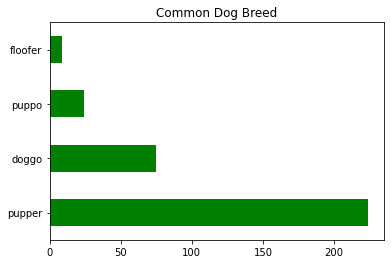

In [209]:
df1[df1.dog_type.notna()]['dog_type'].value_counts().plot(kind='barh', title='Common Dog Breed', color='green');

Pupper is the most common dog type.

#### Number of Tweets per Month

In [210]:
# Select the year and month from the timestamp using string slicing
df1['time_df'] = df1['timestamp'].str[:7]
df1.head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type,retweet_count,favorite_count,time_df
0,892420643555336193,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8853,39467,2017-08
1,892177421306343426,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6514,33819,2017-08


In [211]:
# Aggregate the number of tweets per month.
tweet_time = df1.groupby('time_df', as_index=False)['time_df'].value_counts()
tweet_time.head()

,time_df,count
0,2015-11,300
1,2015-12,388
2,2016-01,194
3,2016-02,125
4,2016-03,136


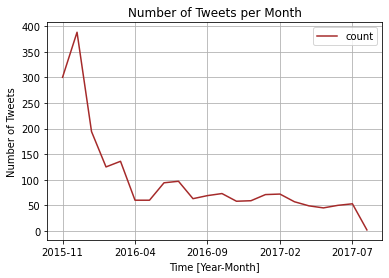

In [212]:
# Plot the tweet time on a line chart
tweet_time.plot(x='time_df', y='count', xlabel='Time [Year-Month]',
                ylabel='Number of Tweets', title='Number of Tweets per Month', grid=True, color='brown');

The number of tweets by weratedogs per month has a decreasing trend over the years.

## Conclusion

* The number of retweets decreased over the years.
* Pupper is the most common dog type.
* The tweet_id : 744234799360020481 has the highest favourite count of 144301 and retweet count of 70353.

## Limitations

* There were null values in the dataset that are dropped.
* Some observations are invalid and were dropped in the process of wrangling.